In [15]:
import pandas as pd
import numpy as np
from sklearn import tree

#Model and Data Manipulation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#####Plotting
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dataset = pd.read_csv("zoo.csv")

In [23]:
dataset.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [24]:
dataset.info()
plt.savefig('plot2.png', dpi=600)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<Figure size 432x288 with 0 Axes>

In [25]:
print(dataset.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

# Now lets take a look at how the class type is distributed

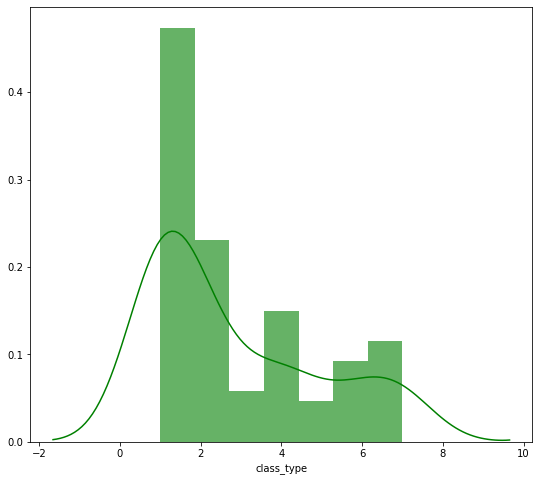

In [26]:
dataset_plot = dataset.drop('animal_name', axis=1)
plt.figure(figsize=(9, 8))
sns.distplot(dataset_plot["class_type"],color='g',hist_kws={'alpha': 0.6},bins=7,norm_hist=True)
plt.savefig('class_type_distribution.png',dpi=600)

# Histogram of Dataset

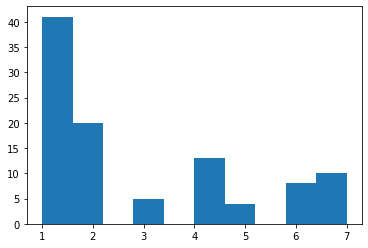

In [27]:
plt.hist(dataset["class_type"])
plt.savefig('class_type_histogram.png')

# Numerical Data Distribution

In [28]:
df_num = dataset.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Histogram of Whole Dataset

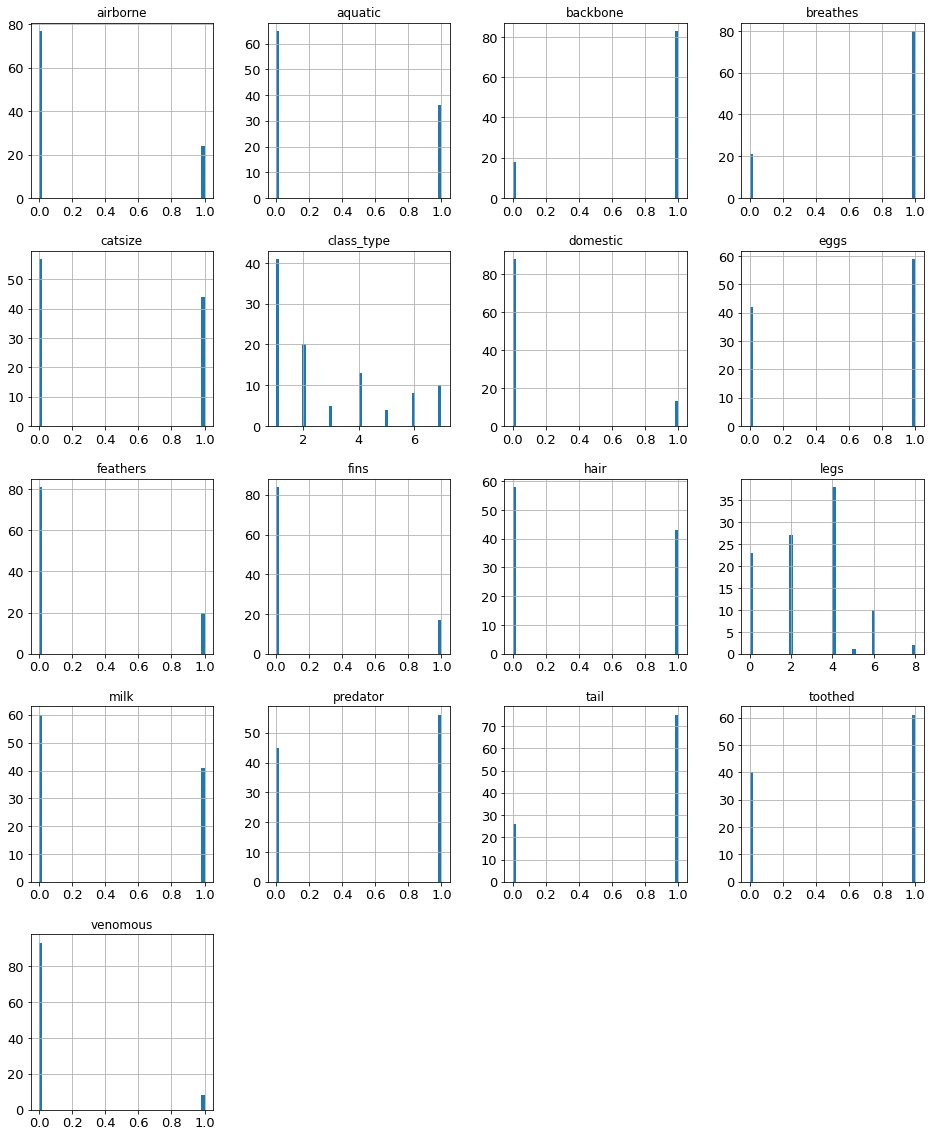

In [48]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=13, ylabelsize=13);
plt.savefig('histogram_dataset.png',dpi=300)

# Now we will try to find which features are strongly correlated with class type.

In [33]:
df_num_corr = dataset.corr()['class_type'][:-1] # -1 because the latest row is class type
golden_features_list = df_num_corr[df_num_corr > 0.1].sort_values(ascending=False)
print("There is/are {} strongly correlated values with class type:\n{}".format(len(golden_features_list), golden_features_list))

There is/are 4 strongly correlated values with class type:
eggs        0.661825
aquatic     0.326639
venomous    0.321476
legs        0.131693
Name: class_type, dtype: float64


# Pairplot of Dataset

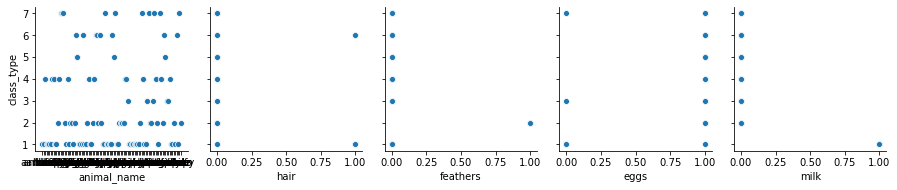

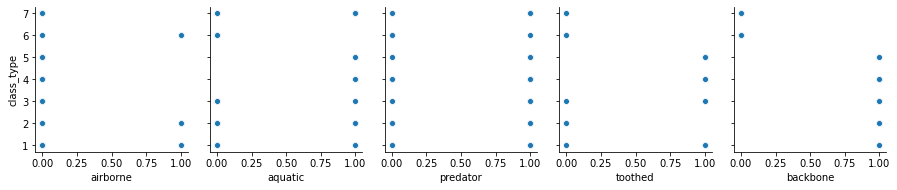

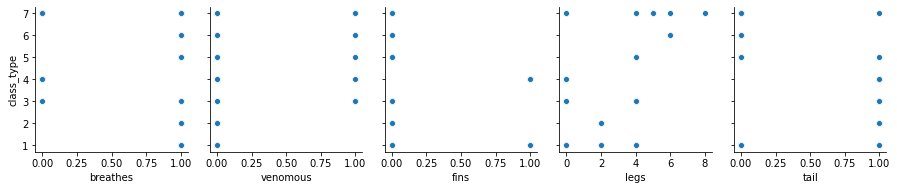

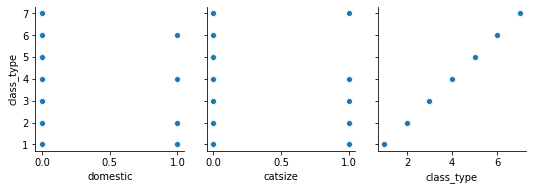

In [34]:
for i in range(0, len(dataset.columns), 5):
    sns.pairplot(data=dataset,
                x_vars=dataset.columns[i:i+5],
                y_vars=['class_type'])
plt.savefig('plot3.png', dpi=900)

# Correlation Heatmap of Dataset

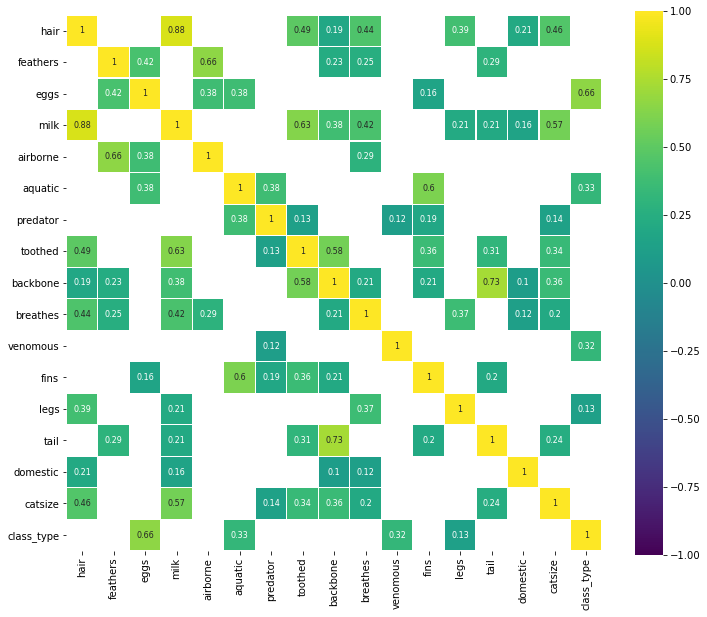

In [35]:
corr = dataset.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

plt.savefig('correlation_heatmap.png')

In [36]:
dataset=dataset.drop('animal_name', axis=1)

# Selecting Features with Highest Correlation with Class Type

In [37]:
train,test=train_test_split(dataset, test_size=0.2, random_state=6)

trainX = train[["venomous","aquatic","eggs","legs"]]
trainY = train["class_type"]

testX = test[["venomous","aquatic","eggs","legs"]]
testY = test["class_type"]

## Training Decision Tree

In [38]:
id3 = tree.DecisionTreeClassifier()
id3 = id3.fit(trainX,trainY)

In [39]:
prediction = id3.predict(testX)
print("Accuracy:",accuracy_score(testY,prediction))

Accuracy: 1.0


## Training Logistic Regression

In [40]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(trainX, trainY)

LogisticRegression(multi_class='multinomial')

In [41]:
prediction=model.predict(testX)
print("Accuracy:",accuracy_score(testY,prediction))

Accuracy: 0.9523809523809523


# Using All Features of Dataset for Prediction

In [42]:
train,test=train_test_split(dataset, test_size=0.2, random_state=6)

trainX = train.drop("class_type", inplace=False, axis=1)
trainY = train["class_type"]
testX = test.drop("class_type", inplace=False, axis=1)
testY = test["class_type"]

## Training Decision Tree

In [43]:
id3 = tree.DecisionTreeClassifier()
id3 = id3.fit(trainX,trainY)

In [44]:
prediction = id3.predict(testX)
print("Accuracy:",accuracy_score(testY,prediction))

Accuracy: 1.0


## Training Logistic Regression

In [45]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model.fit(trainX, trainY)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [46]:
prediction = id3.predict(testX)
print("Accuracy:",accuracy_score(testY,prediction))

Accuracy: 1.0


# Ploting Decision Tree

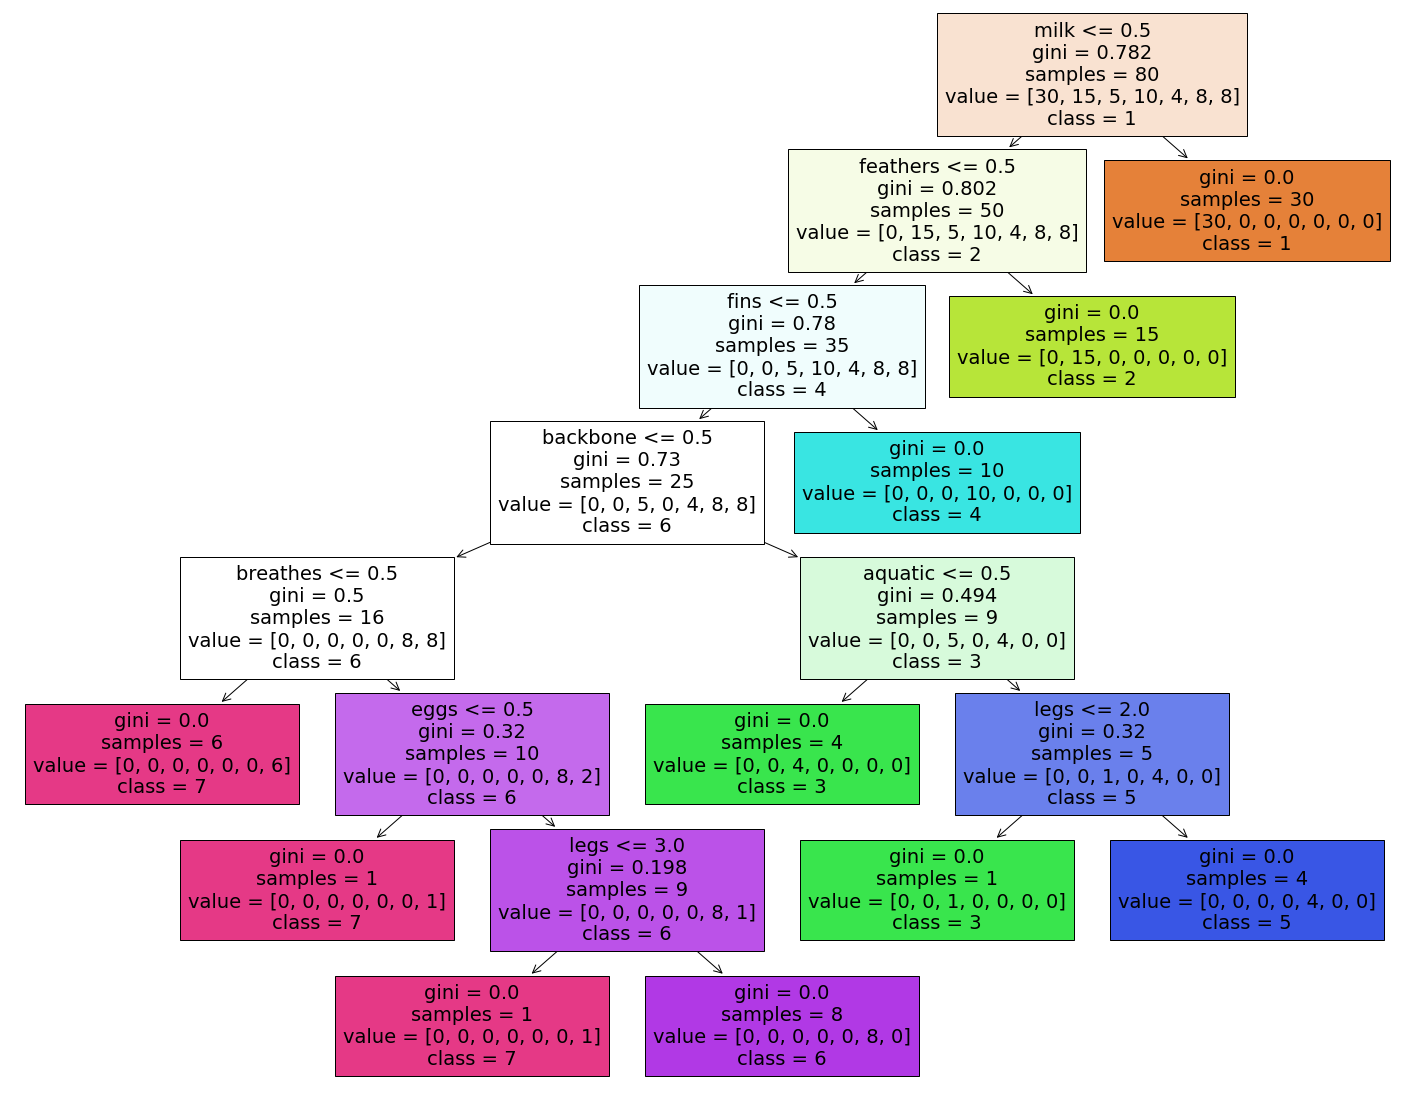

In [49]:
class_names=train["class_type"].unique()
class_names.sort()
class_labels = [str(int) for int in class_names]
class_labels = "".join(class_labels)


plt.figure(figsize=(25,20))
tree.plot_tree(id3, 
               feature_names=dataset.columns,
               class_names =class_labels,
               filled=True)

plt.savefig('decisionTree.png',format='png',dpi=300)
plt.show()